## Example 1

In [1]:
# Inport the necessary module
import torch
from torch import nn

# Input
Input = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
#Kernel
Kernel = torch.tensor([[4.0, 1.0], [2.0, 3.0]])

# Redefine the shape in 4 dimension
Input = Input.reshape(1, 1, 2, 2)
Kernel = Kernel.reshape(1, 1, 2, 2)

# Transpose convolution Layer
Transpose = nn.ConvTranspose2d(in_channels =1, 
                               out_channels =1,
                               kernel_size=2, 
                               stride = 2, 
                               padding=0, 
                               bias=False)

# Initialize Kernel
Transpose.weight.data = Kernel
# Output value
Transpose(Input)

tensor([[[[ 0.,  0.,  4.,  1.],
          [ 0.,  0.,  2.,  3.],
          [ 8.,  2., 12.,  3.],
          [ 4.,  6.,  6.,  9.]]]], grad_fn=<ConvolutionBackward0>)

## Example 2

In [2]:
import torch
import torch.nn as nn

# Define input image
input_image = torch.randn(1, 1, 4, 4)
print('Input Shape:',input_image.shape)
# Define kernel size
kernel_size = (3, 3)

# Define stride
stride = (2, 2)

# Define padding
padding = (1, 1)

# Define transposed convolution layer
transposed_conv = nn.ConvTranspose2d(in_channels=1,
                                     out_channels=1,
                                     kernel_size=kernel_size, 
                                     stride=stride,
                                     padding=padding)

# Perform transposed convolution
output = transposed_conv(input_image)

# Display output
print("output \n", output)
print("\n output Shape", output.shape)

Input Shape: torch.Size([1, 1, 4, 4])
output 
 tensor([[[[ 0.0885,  0.0710,  0.0474, -0.0044, -0.0837, -0.1761, -0.2465],
          [ 0.0531,  0.2630, -0.3710, -0.4956,  0.1199,  0.0408, -0.0469],
          [ 0.1496,  0.2663,  0.5500,  0.4753, -0.1197, -0.1801, -0.1315],
          [ 0.0851,  0.5451,  0.3231, -0.6454, -0.2236,  0.1720, -0.4529],
          [ 0.1863,  0.2607,  0.3972,  0.4132,  0.2014,  0.2844,  0.4300],
          [ 0.3028,  0.5448,  0.1535, -0.1689, -0.0131,  0.0622,  0.5636],
          [-0.0013,  0.0788,  0.3998,  0.4559,  0.3498,  0.3138,  0.0045]]]],
       grad_fn=<ConvolutionBackward0>)

 output Shape torch.Size([1, 1, 7, 7])


## With Real Images

Input image size: torch.Size([3, 895, 720])
unsqueeze Image size torch.Size([1, 3, 895, 720])
Kernel Size : torch.Size([3, 3, 2, 2])
Output image size: torch.Size([3, 1788, 1438])


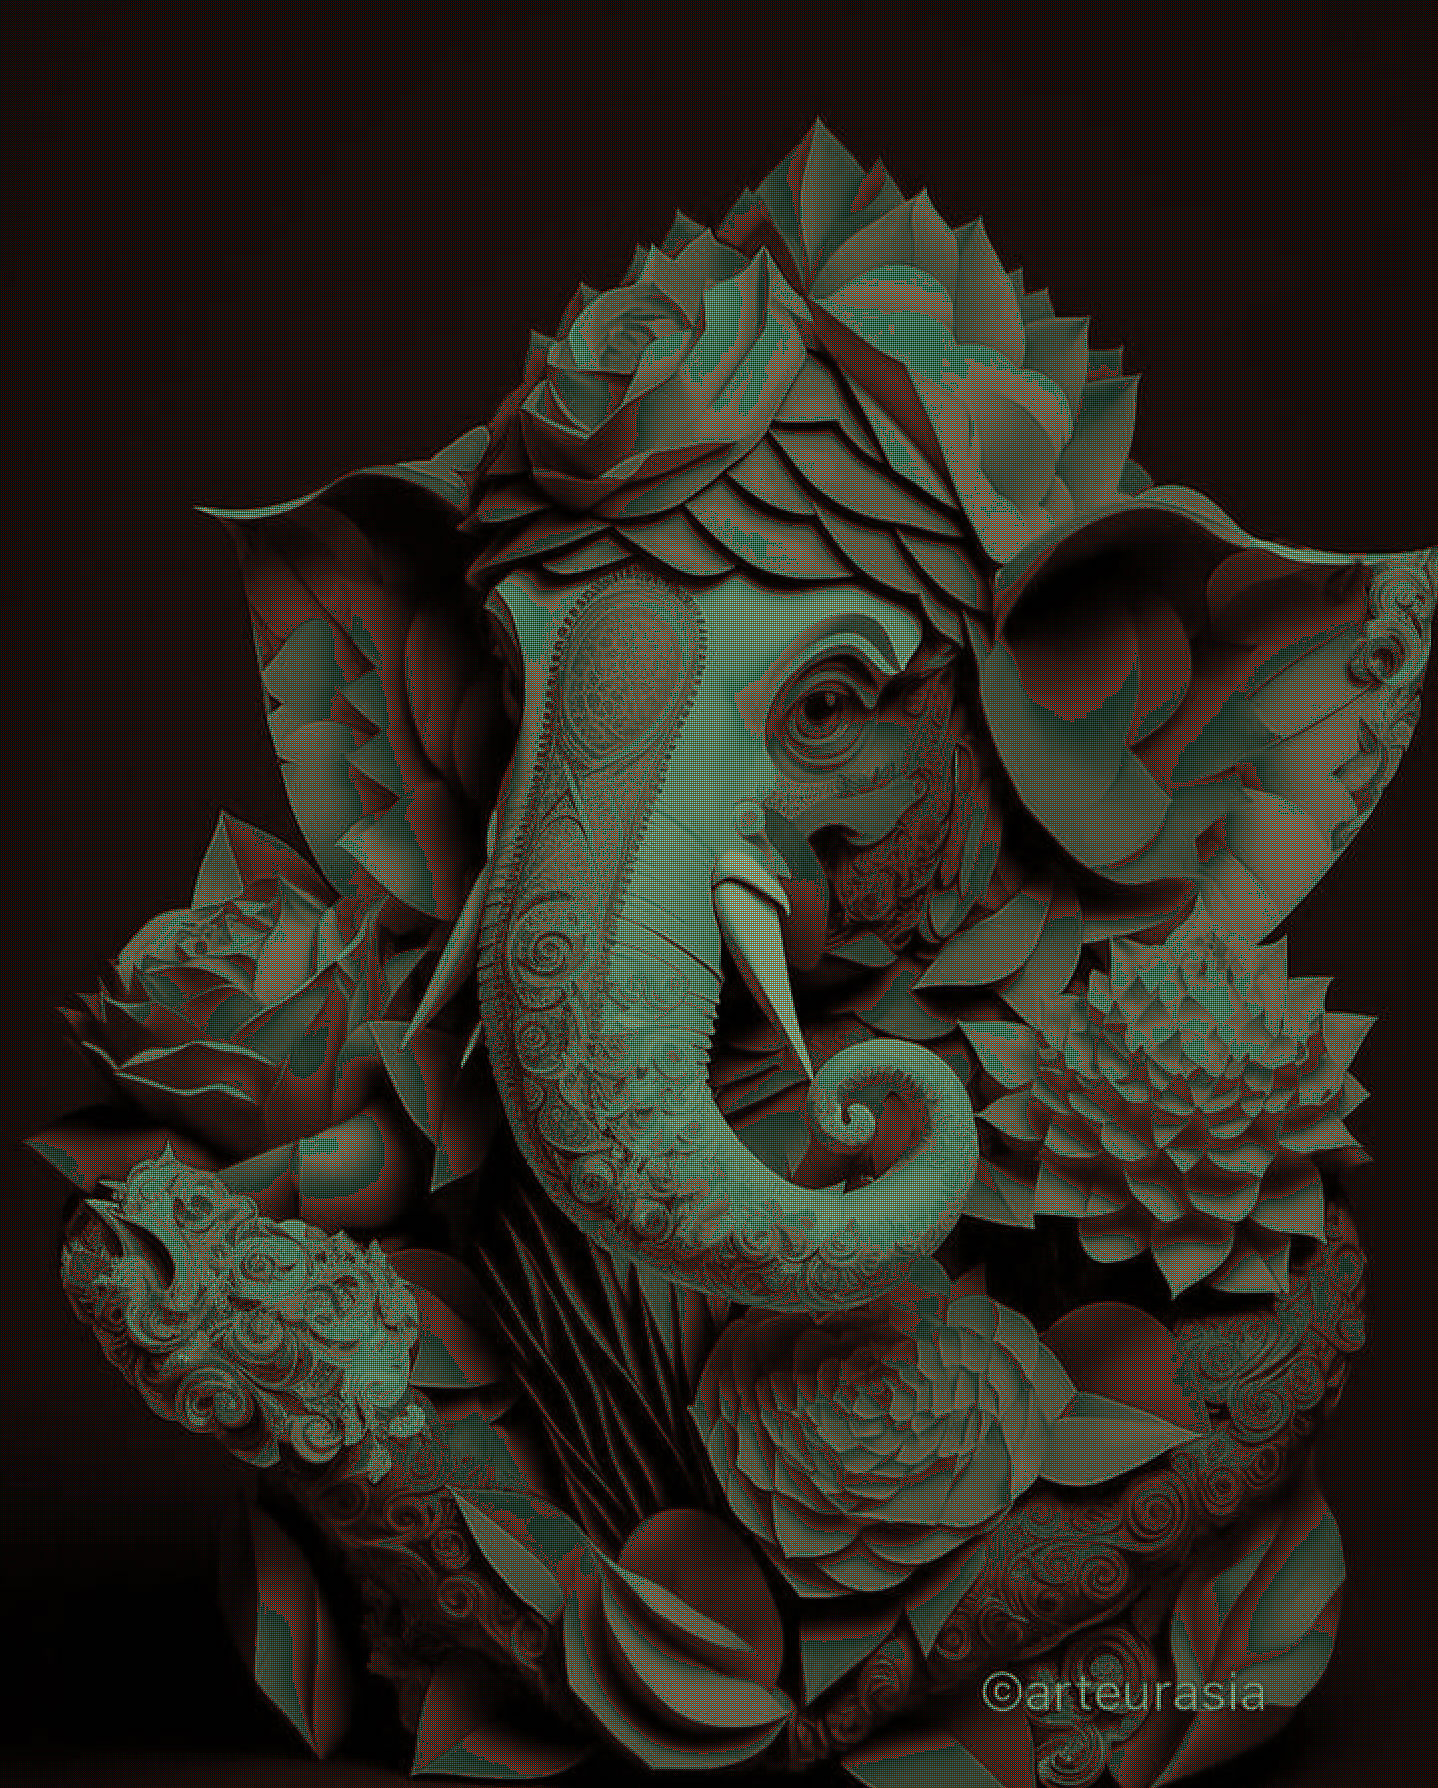

In [3]:
# Inport the necessary module
from PIL import Image
import torch
from torch import nn
from torchvision import transforms

# Read input image
img = Image.open('/kaggle/input/ganesh/Ganesh.jpg')

# convert the input image to torch tensor
img = transforms.ToTensor()(img)
print("Input image size:", img.size())

# unsqueeze the image to make it 4D tensor
img = img.unsqueeze(0) 
print('unsqueeze Image size',img.shape)

#Kernel
Kernel = torch.tensor([
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
])

# Kernel shape
print('Kernel Size :',Kernel.shape)


# Transpose convolution Layer
Transpose = nn.ConvTranspose2d(in_channels =3, 
                               out_channels =2,
                               kernel_size=2, 
                               stride = 2, 
                               padding=1, 
                               bias=False)

# Initialize Kernel
Transpose.weight.data = Kernel

# Output value
img2 = Transpose(img)

# squeeze image to make it 3D
img2 = img2.squeeze(0)
print("Output image size:",img2.size())

# convert image to PIL image
img2 = transforms.ToPILImage()(img2)

# display the image after convolution
img2